<a href="https://colab.research.google.com/github/mahynski/chemometric-carpentry/blob/main/notebooks/5_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
❓ ***Objective***: This notebook will introduce some machine learning models.  

🔁 ***Remember***: You can always revisit this notebook for reference again in the future.  Ideas and best practices will be reinforced in future notebooks, so don't worry about remembering everything the first time you see something new.

🧑 Author: Nathan A. Mahynski

📆 Date: June 10, 2024

---

We have discussed the concept of a pipeline 🔩 and its two main aspects: preprocessing and modeling.  Conventional chemometric models 🔬, while often older than many machine learning 💻 ones, are still very useful because they are designed to handle specific situations encountered in chemometric applications that are not as routine in other disciplines (like $N << p$).  However, one reason [PyChemAuth](https://pychemauth.readthedocs.io/en/latest/index.html) follows sklearn's [estimator API](https://scikit-learn.org/stable/developers/develop.html) is that the machine learning ecosystem is vast and has many powerful tools in it that we would like to leverage for chemometric studies.  Machine learning is now a mature, popular field with many introductory text books, tutorials, and other resources.  Here, we will only focus on the topics most relevant to chemometric modeling so the following summary is not remotely exhaustive.

❗ Perhaps the most important thing to keep in mind is that our goal is not always to simply find the "best performing" model possible.  It is more nuanced than this.  In scientific applications, models should not only perform well (i.e., have $R^2 → 1$, or have high $TEFF$) but should also be interpretable.  

🤔 Imagine that you are presented with a model ⬛ that, when you ask it something about the physical world returns amazingly accurate predictions.  After asking a series of hard questions to develop some faith in the model, your next question would be: how is it doing that?!

For many other (non-scientific) applications, there is sometimes interest in this for reasons related to fairness, equity, and other factors, depending on the use.  However, models are all around us and many serve fairly benign tasks.  In those cases, explainability is not as important to the developer or end user - you just want it to "work".  We do not have that luxury 🍹 - in fact, more often than not, a simpler model that is easy to understand teaches us much more than a black box model that nominally performs "better".

This is focus on the next section, but it is important to keep this in mind now since this helps explain which models from the ML universe 🌌 are most relevant for chemometric applications.

In general, there are two possible goals:
1. Develop the most "accurate" predictive model since, when deployed, this will help improve people's lives 👍.
2. Develop a model, or a series of models, that help us learn about the data and what it means. This is more interactive philosophy that helps the data "talk" 🗨 to us.







sklearn has a nice ["cheat sheet"](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for point you to the right model based on your need and the amount of data you have.  It is helpful suggestion, but not always perfect.

![image](https://scikit-learn.org/stable/_downloads/b82bf6cd7438a351f19fac60fbc0d927/ml_map.svg)

# 📈 Regression Models



Regression models predict a number, or several numbers (multioutput), given some data.  We have reviewed several examples from the classic chemometric 🔬 literature, including:



* [Ordinary Least Squares (OLS)](https://pychemauth.readthedocs.io/en/latest/jupyter/learn/ols.html); [Interactive Tool](https://chemometric-carpentry-ols.streamlit.app/)
* [Principal Components Regression (PCR)](https://pychemauth.readthedocs.io/en/latest/jupyter/learn/pca_pcr.html); [Interactive Tool](https://chemometric-carpentry-pcr.streamlit.app/)
* [Partial Least-Squares (PLS) or Projection to Latent Structures](https://pychemauth.readthedocs.io/en/latest/jupyter/learn/pls.html);  [Interactive Tool](https://chemometric-carpentry-pls.streamlit.app/)

However, these models all contain assumptions and [inductive biases](https://en.wikipedia.org/wiki/Inductive_bias).  Next we will discuss two state-of-the-art models which are on different ends of the "interpretability"
👀 spectrum.

## Artificial Neural Networks

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/images/02_01.png?raw=true" align="right" height=200/>

Neural networks 🧠 get their name from the cellular architecture that originally inspired them: a brain cell (neuron).  The idea is that cells are interconnected and "fire" 🔆 only when a sufficiently large stimulus is provided.  This originates with [McCulloch and Pitts](https://link.springer.com/article/10.1007/BF02478259) in 1943 who interpreted this is a simple logic gate with a binary (on/off) output (image credit to [Rashka & Mirjalili](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master)).

This is a nice introduction to and summary of "fully connected" neural networks from 3Blue1Brown on YouTube.




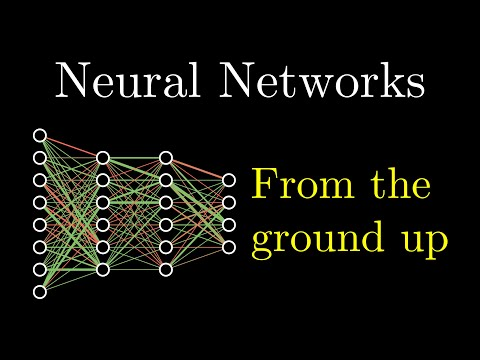

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('aircAruvnKk', width=800, height=500)

<img src="https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019.png" align="right" height=600/>

The basic idea is to connect many such neurons to each other in different ways to create a complex network that can model (either classify or regress) data.  Here is a summary of the "neural network zoo" from the [Asimov Institute](https://www.asimovinstitute.org/neural-network-zoo/).  You can read more about each of these different architectures elsewhere, but the point is that connecting different sorts of nodes in different ways turns out to be a very powerful way to model data.  

In fact, it has been shown that neural networks can fit essentially ANY function arbitrarily well 🤯.  This is due to set of theorems called the [Universal Approximation Theorems (UATs)](https://en.wikipedia.org/wiki/Universal_approximation_theorem).  Deep Mind has a nice discussion and illustration [here](https://www.deep-mind.org/2023/03/26/the-universal-approximation-theorem/).  The important takeaway is that for almost any function that exists, there is a neural network that will approximate it arbitrarily well - [even with only a single layer!](https://towardsdatascience.com/can-neural-networks-really-learn-any-function-65e106617fc6).  Finding that network is hard, though, which is the subject of much research, [best practice development](https://course.fast.ai/), and the [importance of GPUs](https://towardsdatascience.com/what-is-a-gpu-and-do-you-need-one-in-deep-learning-718b9597aa0d) in this field.

---
> ❗ Still, this is the basic reason that ANNs are so successful today.  ANNs are universal function approximators!
---

[Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) extended McCulloch & Pitts' neuron model 🧠 (which was not trainable in its original form) to include a ["perceptron learning rule"](https://babel.hathitrust.org/cgi/pt?id=mdp.39015039846566&view=1up&seq=2); this extended the neuron model by including a series of "weights" (learnable floating point numbers) that

<img src="https://www.deep-mind.org/wp-content/ql-cache/quicklatex.com-8f3f3f0af73f36169790d5b5ac89d884_l3.svg" align="left">

1. ✖ multiply each input, which are then
2. ➕ are summed and
3. 🔆 passed through an activation function.

This is sketched at the left (image credit to [deep mind](https://www.deep-mind.org/2023/03/26/the-universal-approximation-theorem/)), though the activation function is not explicitly shown (nor is it usually, [unfortunately](https://towardsdatascience.com/please-stop-drawing-neural-networks-wrong-ffd02b67ad77)).

The activation function MUST be a non-linear function ➰, such as a step function, which determines whether or not the neuron "fires".  It is very important that this is non-linear, since otherwise we could reduce the operation to a simple vector (linear) operation.  For example, the operation depicted at the left appears to be simply $\vec{x} \cdot \vec{w}$ where $\vec{x}$ is the vector of inputs (a row in $X$ for example) and $\vec{w}$ is the vector of weights.

---
> ❗ The activation function is the secret to creating incredibly complex and powerful networks.
---

Weights are learned through an optimization process which is often [stochastic](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) and involve some special tricks like [backpropagation](https://en.wikipedia.org/wiki/Backpropagation), but this is a fairly standardized process now.

👉 [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) is a very common activation function, but there are many [options](https://en.wikipedia.org/wiki/Activation_function).  ReLUs are often used to solve the [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) so weights are easier to calculate in practice.

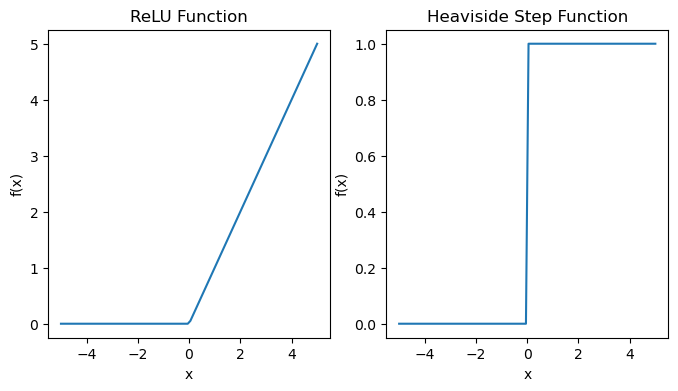

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    # https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
    if x < 0:
        return 0
    else:
        return x

def heaviside_step(x):
    # https://en.wikipedia.org/wiki/Step_function
    if x < 0:
        return 0
    else:
        return 1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

x = np.linspace(-5, 5, 100)
axes[0].plot(x, [relu(x_) for x_ in x])
axes[0].set_title('ReLU Function')

axes[1].plot(x, [heaviside_step(x_) for x_ in x])
axes[1].set_title('Heaviside Step Function')

for ax in axes:
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')

3.5999999999999996 1
-2.4 0


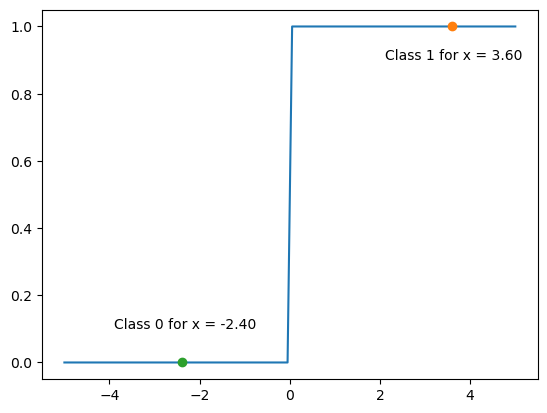

In [3]:
input = np.array(
    [
        [1, 2, 3, 10],
        [1, 2, 3, 30]
    ]
)

# Learnable weights that multiply the input
weights = np.array([0.1, 0.5, 2.0, -0.3])

# There is usually a constant "bias" unit added also (like an intercept term in OLS)
bias_unit = -0.5

# The stimulus the neuron receives
stimulus_0 = np.dot(input[0], weights) + bias_unit
stimulus_1 = np.dot(input[1], weights) + bias_unit

# This step function returns a 0 or 1 (useful for binary classification, for example)
activation_function = heaviside_step

plt.plot(x, [heaviside_step(x_) for x_ in x])
for stim in [stimulus_0, stimulus_1]:
    x_, y_ = stim, heaviside_step(stim)
    plt.plot([x_], [y_], 'o')
    plt.text(
        x_ - 1.5,
        y_-0.1 if y_ == 1 else y_ + 0.1,
        f'Class {y_} for x = {"%.2f"%x_}'
    )

print(stimulus_0, activation_function(stimulus_0))
print(stimulus_1, activation_function(stimulus_1))

<img src="https://www.deep-mind.org/wp-content/ql-cache/quicklatex.com-bd34b47a314100c4bada3b9412cc5dd2_l3.svg" align="left">

The idea of [Multilayer perceptrons](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron) is to include intermediate ("hidden") layers between the input and output. The image at the left (credit to [deep mind](https://www.deep-mind.org/2023/03/26/the-universal-approximation-theorem/)) shows the input vector in green (one circle for each value in the vector), 3 hidden layers in blue, and the output layer in red (here, 3 numbers are being predicted).  

👉 If there were no non-linear activation functions, then it can be shown that the operations performed by the network at the left could be reduced to a matrix, $B$, with shape $4 \times 3$, so that

$$
Y = XB
$$

where $X$ is $N \times 4$, so that $Y$ has the shape $N \times 3$. Recall, that OLS provides an explicit equation for $B$ which represents the least-squares result, for example.

Each node has its own weights associated with it which can be learned.  If each node in a layer is connected to each node in the next (acts as input to that node), this is referred to as a "fully connected feed-forward neural network."  This is the type of ANN most commonly employed in chemometric applications; thanks to the UATs we can use this sort of network to predict basically anything we want!

⏩ There are highly optimized libraries for building and training neural networks such as:

* [Keras](https://keras.io/)
* [PyTorch](https://pytorch.org/)

However, [sklearn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-network-models-supervised) has its own implementation which is typically fine for small networks with a relatively small amount of data.  For chemometric applications, this is often perfectly adequate 👍.

Neural networks, in general, are enormously powerful but have a few significant challenges associated with training them well:

1. 🎢 Hidden layers generally create a "non-convex" loss function; this means there are multiple local minima each of which represent a different set of learned weights. It can be hard to find the global minima (overall best) and different random weight initializations can lead to different results.

2. 🧮 They require tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations to run the weight optimization ("epochs").

3. ⚖ They are sensitive to feature scaling.

4. 👀 They can be hard to interpret.

👉 Note that my changing the end of the neural network to something like a [softmax](https://en.wikipedia.org/wiki/Softmax_function) function, we can also do [classification](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification).

---
> ❗ Read the documentation on sklearn's MLPRegressor.
---

In [4]:
from sklearn.neural_network import MLPRegressor
?MLPRegressor

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

data = load_diabetes(return_X_y=False, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, shuffle=True, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

settings = {
    'activation':'relu',
    'solver':'lbfgs',
    'alpha':1e-5,
    'hidden_layer_sizes':(5, 2),
    'random_state':42,
    'max_iter':5000
}

clf_small = MLPRegressor(**settings)
clf_small.fit(X_train, y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=5000,
             random_state=42, solver='lbfgs')

In [6]:
X_train.shape

(353, 10)

In [7]:
clf_small.coefs_[2].shape

(2, 1)

In [8]:
# These are the weights in each layer - modern networks commonly have millions to trillions of weights!
# Layer 1 has 10 inputs * 5 nodes = (10 x 5)
# Layer 2 has 5 nodes ouputting from last layer feeding into 2 = (5 x 2)
# Layer 3 has 2 nodes outputting from the last layer producing a single floating point number = (2 x 1)
clf_small.coefs_

[array([[-2.68310478, -0.35557506,  3.31769132,  1.44530836,  1.90303418],
        [-2.3707841 , -0.43314829,  0.55585735, -0.06537757,  2.11692319],
        [ 1.07583817,  2.05356102,  1.15750938, -2.19618284,  0.38016188],
        [ 0.40410665,  1.53100346, -0.16001733, -0.08827811,  2.93618233],
        [-6.18442099, -7.87831346, -5.07828739, -1.27871076,  4.95390929],
        [ 7.93255176,  4.26261077,  0.12162623, -1.12788605, -2.77935032],
        [ 0.83192527,  2.6449901 ,  2.38455687, -0.28562145, -2.69849596],
        [-0.93022619,  2.90436339,  2.71642428, -4.80615276, -1.94670507],
        [ 3.48499658, -0.14913502,  4.1850034 ,  0.93912094, -1.38601274],
        [ 0.20809123, -1.78173268,  2.14618474, -0.98819949, -2.52387923]]),
 array([[ 5.79401844, -0.77671256],
        [ 5.96189863, -0.84207494],
        [ 5.06319094, -0.20612949],
        [ 2.23392897, -0.30229099],
        [ 3.54714404, -0.40563023]]),
 array([[ 1.74972548],
        [-1.05634683]])]

In [9]:
# The bias vectors are here
clf_small.intercepts_

[array([ 5.807289  , -2.94818281,  3.48650493, -3.05203288,  1.43602622]),
 array([ 3.53691869, -1.21593949]),
 array([17.1270701])]

In [10]:
clf_small.score(X_train, y_train), clf_small.score(X_test, y_test)

(0.6033458984219178, 0.4288712624220883)

Text(0, 0.5, 'Predictions')

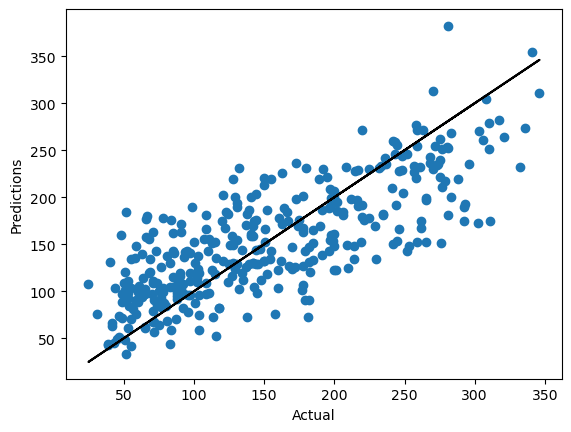

In [11]:
import matplotlib.pyplot as plt

plt.plot(
    y_train,
    clf_small.predict(X_train),
    'o'
)

plt.plot(
    y_train,
    y_train,
    'k-'
)

plt.xlabel('Actual')
plt.ylabel('Predictions')

❓ Q: If NNs are universal function approximators, why would we use anything else?

🙋 A: A number of reasons.  Interpretability is one significant factor.  However, it is also difficult to train a neural network in the low data limit, which most chemometric applications exist in.  As a result, more advanced concepts, like [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning), usually need to be leveraged.

⭐ Techniques like transfer learning and the creation of [foundation models](https://en.wikipedia.org/wiki/Foundation_model) enable us to train AI/ML models in the "low data" limit, where many chemometric applications fall, so all is not lost.  The future may bring many new and exciting tools to this discipline.

## Explainable Boosting Machine

[Explainable boosting machines (EBM)](https://www.cs.cornell.edu/~yinlou/papers/lou-kdd13.pdf) are [glassbox](https://interpret.ml/docs/glassbox.html) models ⬜ designed to be as powerful as state-of-the-art ensemble models (see below) while being completely interpretable.  

👉 They can also be used for classification, but I will focus on the regression case here.

EBMs are based on decision trees 🌳 (described below) which are added together in a "boosted" fashion 🚀 (also described below).  More details can be found [here](https://interpret.ml/docs/ebm.html), but this is the basic idea.

> EBMs are [generalized additive models (GAMs)](https://en.wikipedia.org/wiki/Generalized_additive_model) with pairwise interactions.
>
> A linear model refers to a model which simply multiplies each feature by a coefficient and add them up:
>
> $$
> y = b_0 + b_1 x_1 + \cdots b_n x_n = b_0  + \sum b_i x_i
> $$
>
> The coefficients are determined by minimizing the sum of squared errors (see OLS). An [additive model](https://en.wikipedia.org/wiki/Additive_model) extends this by replacing each feature with a *(shape) function*, $f$, of that feature:
>
> $$
> y = b_0  + f(x_1) + \cdots f(x_n) = b_0  + \sum f_i(x_i)
> $$
>
> A generalized additive model adds a [link function](https://en.wikipedia.org/wiki/Generalized_linear_model#Link_function), $g$, so that
>
> $$
> g(y) = b_0  + f(x_1) + \cdots f(x_n) = b_0  + \sum f_i(x_i)
> $$
>
> or equivalently,
>
> $$
> y = g^{-1}\left( b_0  + f(x_1) + \cdots f(x_n) \right) = g^{-1} \left( b_0  + \sum f_i(x_i) \right)
> $$
>
> GAMS are a combination of generalized linear models (GLMs) and additive models. sklearn has a concise description of GLMs [here](https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-models) covering different link functions (note that the minimization problem defining the solution to the coefficients changes for different cases). 👆 Note a single layer perceptron is a type of GLM! EBMs extend this to automatically detect and include pairwise interactions so the function looks like this:
>
> $$
> g(y) = \sum f_i(x_i) + \sum_{i,j} f_{i,j}(x_i, x_j)
> $$

EBMs are trained in the following way:

1. Train a very small decision tree to predict the output, $y$, using only feature 1. Send the residual (error) to the next step.

2. Train another small tree to predict this residual using only feature 2. This is a method called "boosting."

3. 🔁 Repeat this for all features.

4. 🔁 Return to step 1 and train a small decision tree to predict the residual from feature $n$ on the last iteration.

5. 🔁 Repeat this outer loop many times.

6. Combine all the trees which use only feature 1 into an ensemble (see below) to get $f_1$, and so on.  These functions are called the "mains".

7. Compute the residual of the main effects to the target.  Then repeat this entire procedure but using pairs of features.

The final model is just the sum of the mains and pairs. You can also add "bagging" and other tools to this very basic description of their algorithm. See the [documentation](https://interpret.ml/docs/ebm-internals.html) for more details.

Rich Caruana, one of the inventors of EBMs, has a presentation on them [here](https://people.orie.cornell.edu/mru8/orie4741/lectures/Tutorial4MadeleineUdellClass_2020Dec08_RichCaruana_IntelligibleMLInterpretML_EBMs_75mins.pdf).

> "Our contribution is to put GAMs on modern, machine learning steroids."

👉 Unfortunately, like most boosting classifiers, they require more data than we typically have available for chemometric applications to outshine other models.  However, if you have the data, [these are a great tool](https://github.com/interpretml/interpret) and work with sklearn.

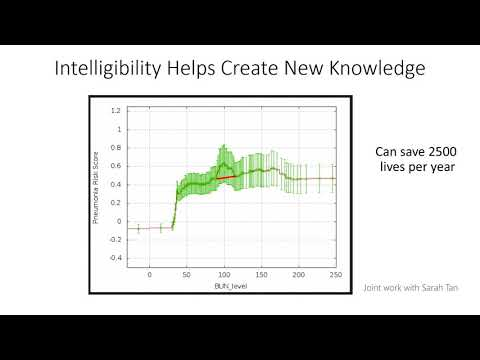

In [12]:
from IPython.display import YouTubeVideo

YouTubeVideo('MREiHgHgl0k', width=800, height=500)

# ✅ Classification Models

## 🌳 Decision Trees

<img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg" height=400 align="right"/>

[Decision trees](https://scikit-learn.org/stable/modules/tree.html#decision-trees) 🌳 are models which break down a decision into a series of "if then" statements. Historically, have been [different ways](https://en.wikipedia.org/wiki/Decision_tree_learning#Decision_tree_types) developed to create these trees, however, the ["classification and regression tree" (CART)](https://doi.org/10.1201/9781315139470) methodology is [implemented in sklearn](https://www.geeksforgeeks.org/cart-classification-and-regression-tree-in-machine-learning/) and is very popular.  Sklearn summarizes some of the differences [here](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart).

CART proceeds like this:

* Starting from the top of the tree, each node contains a criteria ("is column 3 in X greater than 1.234?"); if true, you move away from the node in one direction, if false, you move in another.  

* At each node, the goal is to take the input and split it into the most "pure" chunks possible.  To do this, some function like [entropy or gini impurity](https://scikit-learn.org/stable/modules/tree.html#classification-criteria) is optimized resulting in a value, $v$, for a given feature, $f$, so that when you divide the input based on "is $f$ < $v$?" you produce the best split possible.  This is repeated for all or a subset of features to find the best feature and its split value.  

* This process is then repreated on the new chunks until some stopping criteria is met and the tree has been fully "grown".  The terminal nodes ("leaf" nodes) are assigned the majority class of what is in that node from the training set.

At the right is an example of decision tree from Wikipedia predicting the chances of survival on the Titanic. The number of nodes (depth) is the main hyperparameter in a tree.

👉 Here is sklearn's guidance on [getting the most out of decision trees](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use).

[All models are wrong](https://allmodelsarewrong.github.io/trees.html) has a nice summary of the construction and interpretation of decision trees as well.

👀 Decision trees are considered the "gold standard" of interpretable models since they are so easy to understand.


---
> ❗ Read the documentation on sklearn's DecisionTreeClassifier
---

In [13]:
from sklearn.tree import DecisionTreeClassifier
?DecisionTreeClassifier

Let's train a simple tree on some familiar data: the iris dataset 💐.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris(return_X_y=False, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, shuffle=True, random_state=42,
    stratify=data.target
)

In [15]:
# A depth 1 decision tree is sometimes called a "stump"
stump = DecisionTreeClassifier(
    random_state=0, # Be sure to set this for reproducibility
    max_depth=1,
    class_weight='balanced' # Balance the tree based on class probabilities
)
_ = stump.fit(X_train, y_train)

tree = DecisionTreeClassifier(
    random_state=0, # Be sure to set this for reproducibility
    max_depth=3,
    class_weight='balanced' # Balance the tree based on class probabilities
)
_ = tree.fit(X_train, y_train)

### Visualizing Decision Trees

sklearn has a built-in tool to visualize 👀 your decision tree once it is trained.

---
> ❗ Read the documention of `plot_tree` from sklearn.
---

In [16]:
from sklearn.tree import plot_tree
?plot_tree

Here is some [code from sklearn](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) which helps us understand the internal workings of a decision tree.

In [17]:
import numpy as np

def describe_tree(clf):
    """
    Some code to explain the decision tree.
    """
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node.".format(
                    space=node_depth[i] * "\t", node=i
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

def prediction_path(X, clf, sample_id = 0):
    """
    Follow a series of points, X_test, through the decision tree.
    """
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_indicator = clf.decision_path(X)
    leaf_id = clf.apply(X)


    # obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
    node_index = node_indicator.indices[
        node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
    ]

    print("Rules used to predict sample {id}:\n".format(id=sample_id))
    for node_id in node_index:
        # continue to the next node if it is a leaf node
        if leaf_id[sample_id] == node_id:
            continue

        # check if value of the split feature for sample 0 is below threshold
        if X.iloc[sample_id, feature[node_id]] <= threshold[node_id]:
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print(
            "decision node {node} : (X[{sample}, {feature}] = {value}) "
            "{inequality} {threshold})".format(
                node=node_id,
                sample=sample_id,
                feature=feature[node_id],
                value=X.iloc[sample_id, feature[node_id]],
                inequality=threshold_sign,
                threshold=threshold[node_id],
            )
        )

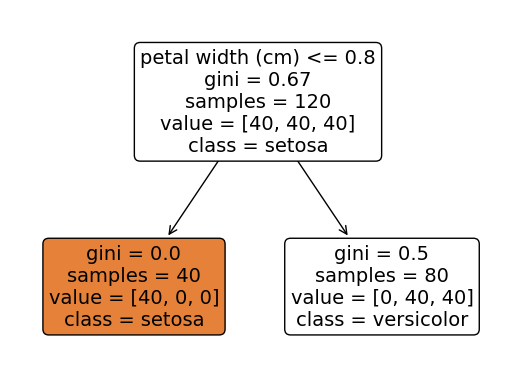

In [18]:
_ = plot_tree(
    stump,
    feature_names=data['feature_names'],
    class_names=data['target_names'],
    label='all',
    impurity=True,
    proportion=False,
    precision=2,
    rounded=True, # Improved visualization
    filled=True # Color-code the tree based on majority class
)

In [19]:
describe_tree(stump)

The binary tree structure has 3 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a leaf node.


In [20]:
sample_id = 1
print(X_train.iloc[sample_id])

prediction_path(
    X_train,
    stump,
    sample_id=sample_id # Row from X_train to analyze
)

sepal length (cm)    4.9
sepal width (cm)     2.5
petal length (cm)    4.5
petal width (cm)     1.7
Name: 106, dtype: float64
Rules used to predict sample 1:

decision node 0 : (X[1, 3] = 1.7) > 0.800000011920929)


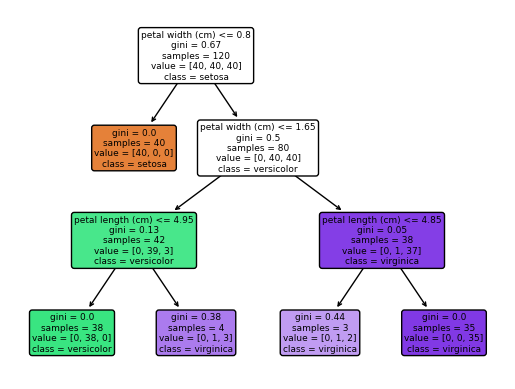

In [21]:
_ = plot_tree(
    tree,
    feature_names=data['feature_names'],
    class_names=data['target_names'],
    label='all',
    impurity=True,
    proportion=False,
    precision=2,
    rounded=True, # Improved visualization
    filled=True # Color-code the tree based on majority class
)

In [22]:
describe_tree(tree)

The binary tree structure has 9 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 3] <= 1.6500000357627869 else to node 6.
		node=3 is a split node: go to node 4 if X[:, 2] <= 4.950000047683716 else to node 5.
			node=4 is a leaf node.
			node=5 is a leaf node.
		node=6 is a split node: go to node 7 if X[:, 2] <= 4.8500001430511475 else to node 8.
			node=7 is a leaf node.
			node=8 is a leaf node.


In [23]:
sample_id = 1
print(X_train.iloc[sample_id])

prediction_path(
    X_train,
    tree,
    sample_id=sample_id # Row from X_train to analyze
)

sepal length (cm)    4.9
sepal width (cm)     2.5
petal length (cm)    4.5
petal width (cm)     1.7
Name: 106, dtype: float64
Rules used to predict sample 1:

decision node 0 : (X[1, 3] = 1.7) > 0.800000011920929)
decision node 2 : (X[1, 3] = 1.7) > 1.6500000357627869)
decision node 6 : (X[1, 2] = 4.5) <= 4.8500001430511475)


### Visualizing Decision Boundaries

You can visualize the decision boundaries and pathways using sklearn; there are also third party tools which can be nice for an even more enhanced experience.  For example, try [dtreeviz](https://github.com/parrt/dtreeviz).

---
> ❗ Read the documention of `DecisionBoundaryDisplay.from_estimator` from sklearn.
---

Also see [here](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py) for more details.

In [24]:
from sklearn.inspection import DecisionBoundaryDisplay
?DecisionBoundaryDisplay.from_estimator

In [25]:
# The visualizer expects there to be only 2 features, so let's retrain a tree
# using on the 2 we care about.
X_ = X_train[['petal length (cm)', 'petal width (cm)']]

tree_viz = DecisionTreeClassifier(
    random_state=0, # Be sure to set this for reproducibility
    max_depth=3,
    class_weight='balanced' # Balance the tree based on class probabilities
).fit(X_, y_train)

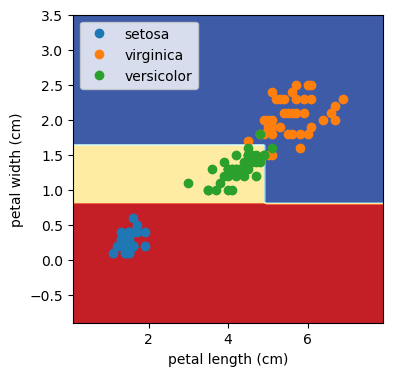

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

for class_ in y_train.unique():
    mask = y_train.values == class_
    ax.plot(X_.iloc[mask,0], X_.iloc[mask,1], 'o', label=data['target_names'][class_])

_ = DecisionBoundaryDisplay.from_estimator(
    tree_viz,
    X_train[['petal length (cm)', 'petal width (cm)']],
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    xlabel='petal length (cm)',
    ylabel='petal width (cm)',
    ax=ax
)

_ = ax.legend(loc='best')

### Pros and Cons

The [primary advantages](https://scikit-learn.org/stable/modules/tree.html#decision-trees) of decision trees are that they are:

1. 🚆 Easy to train,
2. 🤔 Easy to understand,
3. 📏 Require no data standardization!

To understand the last point, remember, a tree is just finding a delimiting value that splits apart a set of points.  It does not make any assumptions about the shape or distribution of the data.

The primary disadvantages include:

1. ⚖ Can be biased if dataset is imbalanced,
2. ➰ Can easily overfit!

The first issue is straightforward to deal with by using a tool like SMOTE; or we can simply specify `class_weight=balanced` when we instantiate the tree to adjust the weights of each point inverse proportional to the class frequencies.

The second issue can be handled by carefully controlling the depth of the tree (deep trees are more likely to overfit).  Or, we can use another approach: model ensembling.

## 🎼 Ensemble Methods

<img src="https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Second-Edition/master/Chapter07/images/07_02.png" height=350 align="right" />

Ensemble methods are meta estimators which combine multiple models to improve generalization accuracy.  The success of this approach comes from having a diverse set of models so that their individual errors are compensated for by other models (see math below).  The different constituents vote and the final prediction is due to this combination.  A common method is to just use the majority (or plurality) vote.  In the figure at the right (from [Raschka & Mirjalili's Python Machine Learning, 2nd Ed.](https://www.packtpub.com/product/python-machine-learning-second-edition-second-edition/9781787125933)) the predictions, $P_i$ for model $i$, can also be weighted by, for example, their certainty; simple majority voting corresponds to identical weights for all participating models.

sklearn has a [detailed discussion](https://scikit-learn.org/stable/modules/ensemble.html#ensembles-gradient-boosting-random-forests-bagging-voting-stacking) on the ensemble methods they have implemented including their capabilities, shortcomings, and applications.  It is worth the time to read this if you are interested.

Ensemble methods are intuitive and quite clever; to see why consider a binary classification task where all base learners have some error rate, $\epsilon$.  If these are independent of each other, then we can express the probability that out of an ensemble of $n$ classifiers, $k$ will be incorrect as a [binomial probability mass function](https://en.wikipedia.org/wiki/Binomial_distribution):

$$
P(k) = {n \choose k} \epsilon^k (1-\epsilon)^{n-k}
$$

If we are taking the majority vote then our ensemble will only predict the wrong answer if the majority of its members are wrong.  This is true when $k \ge n/2$, or

$$
P(k \ge n/2) = \sum_{k=n/2}^n {n \choose k} \epsilon^k (1-\epsilon)^{n-k} = \epsilon_{\rm ensemble}
$$




In [27]:
from scipy.special import comb
import numpy as np
def ensemble_error(n, eps):
    """Based on Raschka & Mirjalili."""
    k0 = int(np.ceil(n / 2.0))
    p = [comb(n, k)*(eps**k)*(1.0-eps)**(n-k) for k in range(k0, n+1)]
    return sum(p)

In [28]:
ensemble_error(11, 0.25)

0.03432750701904297

If we are using an ensemble of 11 classifiers and each is quite poor ($\epsilon = 0.25$, so 75% accuracy), then the chance that at least 6 of them are incorrect is $P \sim 0.034$; since at least 6 of them need to be wrong for a majority vote to produce the wrong prediction, we have now boosted the model from 75% to 96.6% accuracy!

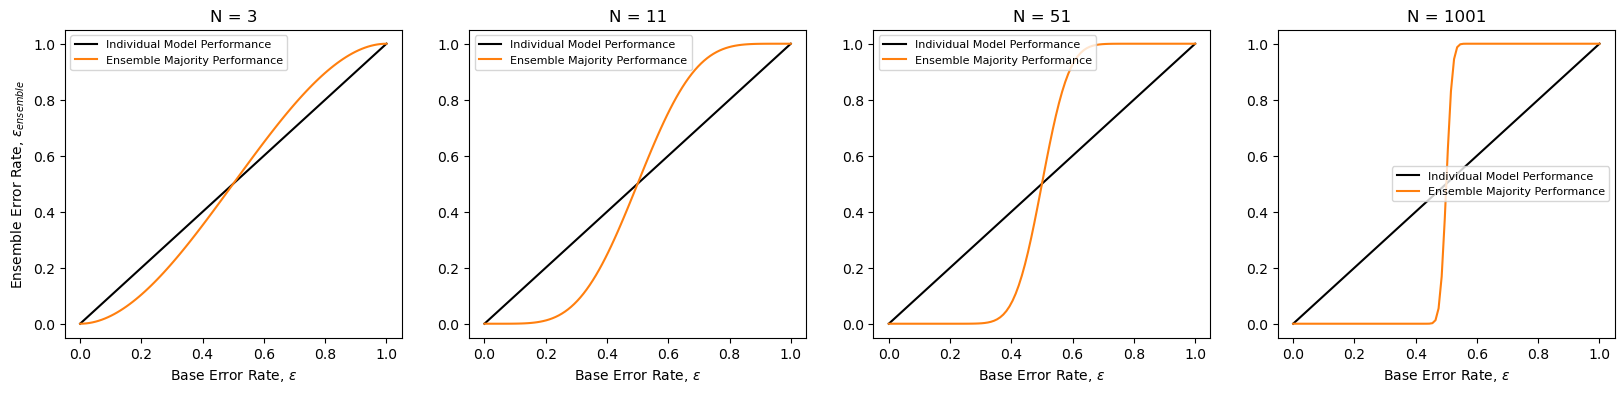

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
axes[0].set_ylabel('Ensemble Error Rate, '+'$\epsilon_{ensemble}$')
for ax, n in zip(axes.ravel(), [3, 11, 51, 1001]):
    eps = np.linspace(0, 1.0, 100)
    ax.plot(eps, eps, 'k', label='Individual Model Performance')
    ax.plot(eps, [ensemble_error(n=n, eps=e) for e in eps], color='C1', label='Ensemble Majority Performance')
    ax.legend(loc='best', fontsize=8)
    ax.set_xlabel('Base Error Rate, '+'$\epsilon$')
    ax.set_title(f'N = {n}')

🤯 Let this sink in - when we have about 50 DIFFERENT models which are only slightly better than flipping a coin, we can drive the ensemble (average) prediction almost to 0!

---

> ❗ The tradeoff is that these are much harder to interpret 👀 now since we need to somehow "understand" many models instead of just one.

---

The key 🔑 is that these models need to "think differently" - that is, we have assumed the errors are uncorrelated (independent) which means each model is reaching its conclusion for a (completely) different reason.  Of course, in reality we never completely achieve this and our true ensemble behavior falls between the two curves above (the black line represents an ensemble of $N$ identical, or completely correlated, models).

👉 The sum 🚗 is greater (better) than its parts ⚙!

You can achieve this in practice several ways including:

1. Using many different models in your ensemble (decision tree, SVC, PLS model, ...)

2. Train models using different data.

In practice, using model inspection tools 🔍 to verify that models behave sufficiently differently can be one way to accomplish the first route.  But it turns out the second way leads to one of the most remarkable models ever created in the field of machine learning!



❓ Q: What happens when $\epsilon > 0.5$?


### Bagging

<a href="https://en.wikipedia.org/wiki/Bootstrap_aggregating"><img align="right" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Ensemble_Bagging.svg/1920px-Ensemble_Bagging.svg.png" width=500px></a>

["Bagging"](https://en.wikipedia.org/wiki/Bootstrap_aggregating) is a portmanteau of [(B)oostrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) (Agg)regat(ing) 👜; the idea is to average many simple models each trained on randomly drawn subsamples of the data (with replacement, hence bootstrap sample).  This averaging, or aggregating, reduces the variance and model overfitting tendencies.  Bagging is a "parallel" operation is the sense that each model in the ensemble is indendent and can therefore be trained separately.  [Bagging works best when you employ strong, complex models](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator) that essentially overfit a boostrapped sample; when averaged over many different bootstraps, the error rate averages to zero (if fully independent).  When averaged, these models tend not to overfit and are fairly insensitive to specific hyperparameter choices - the same is not true for boosting.

<!-- Bagging is when we draw bootstrap samples; if subsets are drawn randomly, this is called "pasting" instead.  You can also draw random features ("random subspaces"), or combine this with pasting to get "random patches" - see the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator) for references and details. -->

❗ Bagging is very good at reducing model variance, but poor at reducing bias; this is why you need to use complex models with *high variance* and *low bias* as base estimators (deep decision trees, for example).

Randomly drawing from the data results in unique elements 63.2% of the time, while the other 37.8% of the data will end up being repeats (if you randomly resample N observations to create a bootstrap resample also of N observations).

See [L. Breiman, "Bagging predictors", Machine Learning, 24(2), 123-140, 1996](https://link.springer.com/article/10.1007/BF00058655) for the original work.

Also check out [All models are wrong](https://allmodelsarewrong.github.io/bagging.html) for more details.

In [30]:
from sklearn.utils import resample

X = np.array(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]
    ]
)
indices = np.arange(len(X))

# Let's look at 3 bootstrap subsamples of this data
for i in range(3):
    idx = sorted(resample(indices, replace=True, n_samples=4, random_state=i*10))
    print(f'Bootrap {i+1}')
    print(np.array([X[k] for k in idx]))
    print(f'Out-of-Bag Samples {i+1}')
    mask = np.array([i not in idx for i in range(len(X))])
    print(X[mask], '\n')

Bootrap 1
[[ 1  2  3]
 [10 11 12]
 [13 14 15]
 [16 17 18]]
Out-of-Bag Samples 1
[[4 5 6]
 [7 8 9]] 

Bootrap 2
[[ 1  2  3]
 [ 4  5  6]
 [13 14 15]
 [16 17 18]]
Out-of-Bag Samples 2
[[ 7  8  9]
 [10 11 12]] 

Bootrap 3
[[ 7  8  9]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]
Out-of-Bag Samples 3
[[ 1  2  3]
 [ 4  5  6]
 [16 17 18]] 



### Boosting

Boosting 🚀 takes a series of weak learners (slightly better than random) and trains them in series to produce a strong model 💪.  This is a "series" operation unlike the "parallel" operation that Bagging relies upon.  [Boosting works best with many weak models](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator), like shallow decision trees; this is in contrast to Bagging which relies on complex models (deep trees) to overfit the data in "different ways" when shown different subsets of the data.

Unlike bagging 👜, boosting 🚀 uses samples drawn without replacement.  The [original boosting algorithm](https://link.springer.com/article/10.1007/bf00116037) developed by Robert E. Schapire et al. in 1990 looks like this:

1. Draw random subset of data and train a classifier, $C_1$.
2. Draw a second random subset of the data and add 50% of the samples from step (1) that were misclassified by $C_1$; train a new classifier, $C_2$.
3. Find the samples in the original training set with $C_1$ and $C_2$ disagree on, and train a third classifier, $C_3$, using that data.
4. Combine all classifiers into a majority vote.

❗ While it is possible for boosting to reduce bias and variance (not just variance) relative to bagging models, they are known for having high variance themselves and can overfit ➰ the data so proper tuning is important.

Schapire et al. received the [Goedel Prize in 2003](https://en.wikipedia.org/wiki/G%C3%B6del_Prize) (kind of like a Nobel Prize in computer science) for this groundbreaking work!  Today, boosted models are believed to have a slight edge in performance over bagged models, but they are expensive and trickier to train properly.

👉 Boosted models are often less practical than bagged models in chemometric applications anyway because they tend to overfit and thus require a held-out test set to evaluate generalization error (and tune hyperparameters).  This removes data from the training set, which is typically already fairly low in chemometric settings.



#### AdaBoost

One of the most popular boosting algorithms is AdaBoost (adaptive boosting) subsequently developed by [Freund and Schapire](https://link.springer.com/content/pdf/10.1007/BF00116037.pdf).  The idea is to essentially weight incorrectly predicted points more in each iteration, so the model learns from the mistakes previously made in the ensemble. From [sklearn's documentation](https://scikit-learn.org/stable/modules/ensemble.html#adaboost):

> "The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, \dots, w_N$, to each of the training samples. Initially, those weights are all set to $W_i = 1/N$, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence."

Graphically, the algorithms can be summarized in the figure at the right from [Raschka & Mirjalili's Python Machine Learning, 2nd Ed.](https://www.packtpub.com/product/python-machine-learning-second-edition-second-edition/9781787125933).
<a href="https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Second-Edition/master/Chapter07/images/07_09.png"><img align="right" src="https://user-images.githubusercontent.com/23516749/275580443-04f466f2-0dd6-4715-ba2a-c749d138f5d8.png" width=400px></a>

The basic algorithm looks like this in pseudocode:
1. Initialize normalized weights, $\sum w_i = 1$.
2. For each boosting round, $j$:
 * Train, $C_j = f(X, y, w)$.
 * Predict, $\hat{y} = C_j(X)$.
 * Compute the error rate, $\epsilon = w \dot (y \neq \hat{y})$. (0 for correct classification, 1 for incorrect in classification tasks)
 * Compute the coefficient, $\alpha_j = 0.5 {\rm log} \left( \frac{1-\epsilon}{\epsilon} \right)$.
 * Update weights, $w = w \times {\rm exp} \left( - \alpha_j \times \hat{y} \times y \right)$. (assuming $y$ is binary vector of +1 or -1 for each class so that correct classifcation results in a positive number and a negative otherwise)
 * Re-normalize the weights.
3. Final prediction is a $\alpha$-weighted average of the $j$ different classifiers, $C_j$, for each point; $\hat{y} = \sum_j \alpha_j C_j(X)$.

There exist discrete and real-valued AdaBoosting methods - see sklearn's [AdaBoost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) and [AdaBoost regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor) documentation here for more discussion.  There is an explicit [example](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html#sphx-glr-auto-examples-ensemble-plot-adaboost-hastie-10-2-py) as well.

#### Gradient Boosting

Again, the idea is to train an ensemble of weak learners in series to create a strong learner.  Following [Wikipedia's example](https://en.wikipedia.org/wiki/Gradient_boosting), the easiest way to illustrate the idea is to follow that of ordinary least squares regression.  In OLS, you are trying to minimize the mean squred error loss function:

$$
\mathcal{L} =\frac{1}{N} \sum \left( y_i - F(x_i) \right)^2
$$

Here, $F(x)$ is the model.  In gradient boosting the idea is that we have an imperfect model at each stage, $m < M$, out of $M$ total.  The error is then $h_m(x) = y - F_m(x)$; the idea is that at each stage a new estimator is added so that $F_{m+1}(x) = F_{m}(x) + h_m(x) = y$.  Gradient boosting fits $h_m(x)$ to the residual $y - F_m(x)$; other variants, like AdaBoost, just focus on correcting errors of the predecessor model.  Note that

$$
\mathcal{L} \sim \left( y - F_m(x) \right)^2
$$

so that

$$
h_m(x) = - \frac{\partial \mathcal{L}}{\partial F} \sim y - F_m(x)
$$

This interpretation that the residual is actually the gradient of the loss function with respect to the model.  Thus, a model is usually assumed which has some adjustable parameters (weighted sum of functions for example) that lets you take the derivative with respect to the function, $F$, and gradient descent can be employed.  This can be done using trees as the base models, which is what sklearn implements as [gradient boosted trees](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting). Gradient Tree Boosting is a generalization of boosting to arbitrary differentiable loss functions, and can be applied to both regression and classification tasks.

Some specialized, fast implementations exist elsewhere:

* [LightGBM](https://github.com/Microsoft/LightGBM)
* [XGBoost](https://xgboost.readthedocs.io/en/latest/)


## 🌳🌳🌳 Random Forests

[A random forest](https://en.wikipedia.org/wiki/Random_forest) 🌳🌳🌳 is an ensemble model which is produced by combining decision trees.  From the sklearn [documentation](https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles):

> "The [sklearn.ensemble](https://scikit-learn.org/stable/api/sklearn.ensemble.html#module-sklearn.ensemble) module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are [perturb-and-combine techniques](https://www.jstor.org/stable/120059?seq=7) specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers."

<!--
> Note that "In contrast to the [original publication](https://link.springer.com/article/10.1023/a:1010933404324), the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class."
-->

A random forest is constructed in the following fashion:

1. Select a bootstrap (sub)sample of the training data.
2. Train a decision tree on this sample (typically a very deep one). When training the tree, the feature being split on can be found by either searching over all features (default for [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)) or a subset of them (default for [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)).

Selecting a subset of features to consider at each nodes distinguishes a random forest from a "bagged forest."  [All models are wrong](https://allmodelsarewrong.github.io/forest.html) has a nice discussion and more illustrations. Still, a random forest is essentially bagging + decision trees.  They are:

1. 🏃 easily parallelized and fast to train,
2. ❗ generally insensitive to hyperparameters so require little tuning,
3. 👜 can use the "out of bag" (OOB) score to circumvent the need for a held-out test to estimate generalization error,
4. ⚖ can handle class imbalance internally with `class_weight` options,
5. 👀 are less interpretable than an individual tree

❓ Q: Wait, what is an "out of bag" (OOB) score?

🙋 A: Because of bootstrapping, some training data is not used to train each tree in the ensemble.  That unused data data can be treated like a test set and used to evaluate that specific tree.  The "oob" score is the average of this process over all trees in the ensemble.  More details are discussed [here](https://www.geeksforgeeks.org/oob-errors-for-random-forests-in-scikit-learn/).

For tabular data, which is common in chemometric applications, these models (over 20 years old!) are still considered state-of-the-art for accuracy! 🤯 Even neural networks generally do not outperform them.  
* This has even led some neural network libraries to [implement this and related tree ensemble algorithms](https://keras.io/examples/structured_data/classification_with_tfdf/).

👉 While recent algorithm improvements have sped up alternatives like [Histogram-Based Gradient Boosting](https://scikit-learn.org/stable/modules/ensemble.html#histogram-based-gradient-boosting), random forests are still incredibly fast and efficient.  Points 2 - 4 above are the main reasons these are still the most suitable model for chemometric applications since they are less prone to overfit and you do not need to sacrifice data as a held-out test set to estimate model performance.

---
> ❗ Read the documentation on sklearn's RandomForestClassifier.
---

In [31]:
from sklearn.ensemble import RandomForestClassifier
?RandomForestClassifier

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris(return_X_y=False, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    data.data[['petal length (cm)', 'petal width (cm)']], # For the sake of illustration let's just use these 2 features
    data.target, test_size=0.2, shuffle=True, random_state=42,
    stratify=data.target
)

model = RandomForestClassifier(
    n_estimators=100, # Typically this number is ~100 which is sufficient for many applications
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42)

In [33]:
# This is overly optimistic
print(model.score(X_train, y_train))

# The oob score is more conservative and typically loser to that found on a held-out test set
print(model.score(X_test, y_test), model.oob_score_)

0.9916666666666667
0.9666666666666667 0.9583333333333334


---
> ❗ Let's examine how the number of trees in the forest affect performance.
---

In [34]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    (
        "rf",
        RandomForestClassifier(
            n_estimators=100,
            max_features='sqrt',
            bootstrap=True,
            oob_score=True,
            random_state=42,
            class_weight='balanced'
        )
    )
])

param_grid = [{
    'rf__n_estimators':np.linspace(2, 150, 10, dtype=np.int32),
}]

gs = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    cv=KFold(n_splits=5, shuffle=True, random_state=0),
    error_score=0,
    refit=True
)

_ = gs.fit(X_train, y_train)

/home/dsheen/miniconda3/envs/pychemauth/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/dsheen/miniconda3/envs/pychemauth/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/dsheen/miniconda3/envs/pychemauth/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/dsheen/miniconda3/envs/pychemauth/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/dsheen/miniconda3/envs/pyc

In [35]:
# The results of the cross validation are stored here
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_rf__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [36]:
print('N\tScore\n---\t-------')
for n_, score_ in zip(gs.cv_results_['param_rf__n_estimators'].data, gs.cv_results_['mean_test_score']):
    print(n_, '\t', '%.4f'%score_)

N	Score
---	-------
2 	 0.9083
18 	 0.9250
34 	 0.9250
51 	 0.9333
67 	 0.9333
84 	 0.9417
100 	 0.9417
117 	 0.9417
133 	 0.9333
150 	 0.9417


In [37]:
# Best parameters found by CV
gs.best_params_

{'rf__n_estimators': 84}

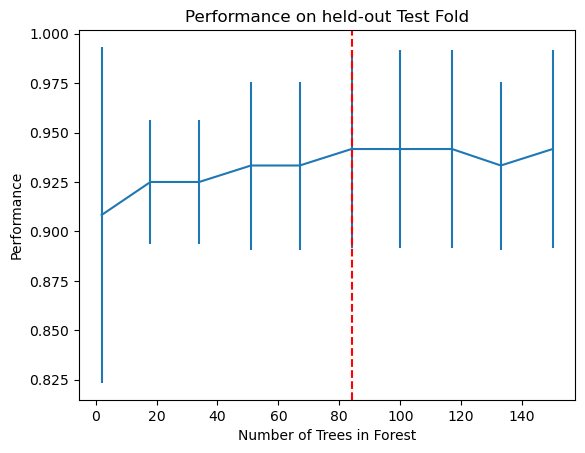

In [38]:
# Typically we see a more dramatic rise in performance, then a plateau, but this is a relatively easy example problem
plt.errorbar(
    x = gs.cv_results_['param_rf__n_estimators'].data,
    y = gs.cv_results_['mean_test_score'],
    yerr = gs.cv_results_['std_test_score'],
)
plt.xlabel('Number of Trees in Forest')
plt.ylabel('Performance')
plt.title('Performance on held-out Test Fold')

plt.axvline(gs.best_params_['rf__n_estimators'], color='red', ls='--')

In [39]:
# The model was retrained automatically with the best parameters so we can just being evaluating new data
gs.score(X_train, y_train), gs.score(X_test, y_test), gs.best_estimator_.named_steps['rf'].oob_score_

(0.9916666666666667, 0.9333333333333333, 0.9583333333333334)

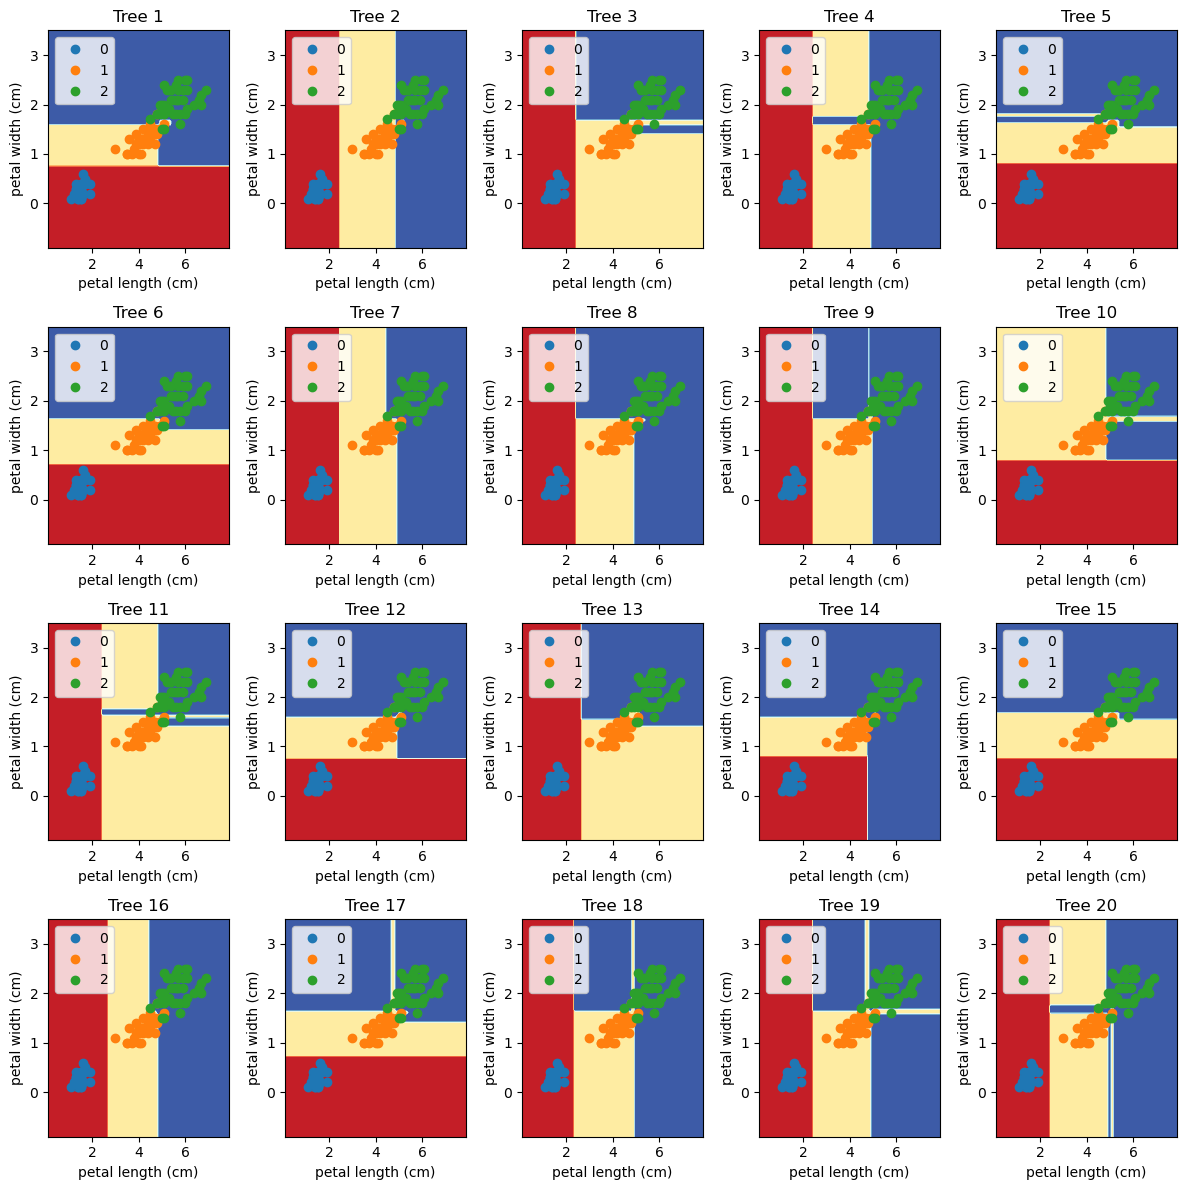

In [40]:
# Let's visualize some of the trees in the ensemble

from sklearn.inspection import DecisionBoundaryDisplay
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12,12))


def plot_(X_, y_, ax, model):
    # Plot the decision boundary
    _ = DecisionBoundaryDisplay.from_estimator(
        tree,
        X_,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        xlabel='petal length (cm)',
        ylabel='petal width (cm)',
        ax=ax
    )

    # Plot the data
    for class_ in np.unique(y_):
        ax.plot(X_[y_ == class_, 0], X_[y_ == class_, 1], 'o', label=class_)
    _ = ax.legend(loc='best')

for i, (ax, tree) in enumerate(zip(axes.ravel(), gs.best_estimator_.named_steps['rf'].estimators_[:len(axes.ravel())])):
    plot_(
        X_train[['petal length (cm)', 'petal width (cm)']].values,
        y_train.values,
        ax,
        tree
    )
    ax.set_title(f'Tree {i+1}')

plt.tight_layout()

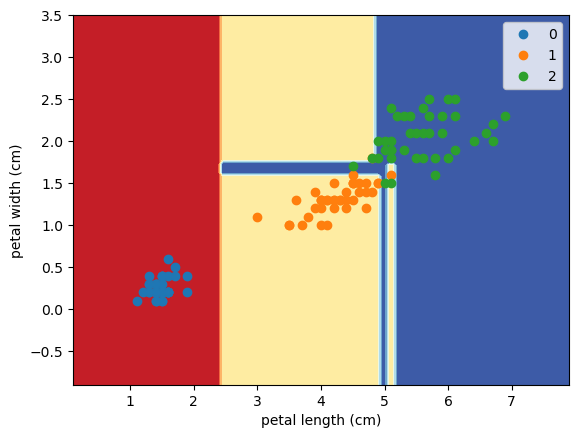

In [41]:
# This is the "average" of the the trees in the ensemble
fig, ax = plt.subplots()

plot_(
    X_train[['petal length (cm)', 'petal width (cm)']].values,
    y_train.values,
    ax,
    gs # We can just use the GridSearchCV object
)

## Logistic Regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is actually a classification model! 😖 It is a special form of a [generalized linear model (GLM)](https://en.wikipedia.org/wiki/Generalized_linear_model) modeling Bernoulli trials ($y_i \in \{0, 1\}$) and uses a [logit](https://en.wikipedia.org/wiki/Logit) link function.  

$$
g(p) = b_0  + b_1 x_1 + \cdots + b_n x_n = b_0  + \sum b_i x_i
$$

$$
g(p) = {\rm logit}(p) = {\rm ln} \frac{p}{1-p}
$$

where the inverse of the logit function is the [logistic function](https://en.wikipedia.org/wiki/Logistic_function), hence the name. Note this is also basically a perceptron where the activation function is the logistic function instead of a Heaviside step function, ReLU, etc.!

$$
g^{-1}(p) = \frac{1}{1 + {\rm exp(-p)}}
$$



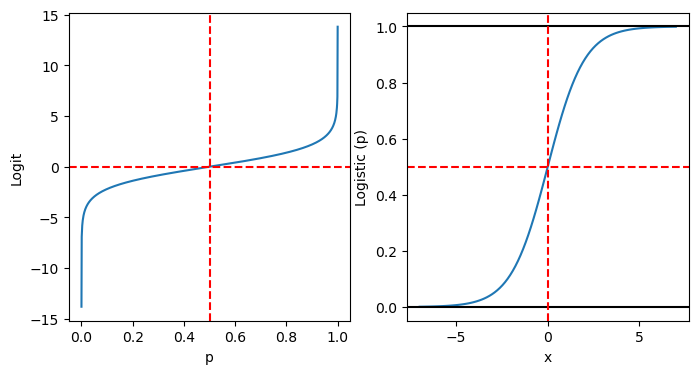

In [42]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

p = np.linspace(1.0e-6, 1-1.0e-6, 1000)
logit = np.log(p / (1 - p))
axes[0].plot(p, logit)
axes[0].set_ylabel('Logit')
axes[0].set_xlabel('p')
axes[0].axhline(0, color='r', ls='--')
axes[0].axvline(0.5, color='r', ls='--')

x = np.linspace(-7, 7, 100)
logistic = 1.0 / (1.0 + np.exp(-x))
axes[1].plot(x, logistic)
axes[1].set_ylabel('Logistic (p)')
axes[1].set_xlabel('x')
axes[1].axhline(0, color='k')
axes[1].axhline(1, color='k')
axes[1].axhline(0.5, color='r', ls='--')
axes[1].axvline(0, color='r', ls='--')

The coefficients, $b_i$, are found by minimizing the loss (error) function (compared to mean squared error for OLS):

$$
\mathcal{L}(b) = \frac{1}{S} \sum_{i=0}^N s_i \left( -y_i {\rm ln}(p_i(\vec{b})) - (1-y_i) {\rm ln}(1-p_i(\vec{b})) \right) + \frac{r(\vec{b})}{SC}
$$

$$
\vec{b}_{\rm optimal} = {\rm min}_b~\mathcal{L}
$$

where $s_i$ are user-assigned weights to a point (which can be used to combat class imbalance) so that $S = \sum_{i=1}^N s_i$, $r(w)$ is the [L1 or L2 regularization term](https://scikit-learn.org/stable/modules/linear_model.html#binary-case), and $C$ is a user defined constant to control the amount of regularization if it is applied.

This can be extended to multiple classes leading to [multinomial logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#mathematical-details-3), which is now the default, recommended approach in [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression). An [analogous loss function](https://scikit-learn.org/stable/modules/linear_model.html#mathematical-details-3) can be defined for this case as well.

⚖ Note that class weighting, via $s$, can also be done with logistic regression to account for any class imbalance, just like in decision trees!

👉 A threshold of $p = 0.5$ is commonly used to classify a target as 0 or 1 for binary predictions.


---
> ❗ Read the documentation on sklearn's LogisticRegression.
---

In [43]:
from sklearn.linear_model import LogisticRegression
?LogisticRegression

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = load_iris(return_X_y=False, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, shuffle=True, random_state=42,
    stratify=data.target
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(
    penalty=None,
    class_weight='balanced',
    solver='lbfgs',
    multi_class='multinomial'
)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   penalty=None)

In [45]:
# Here are the coefficients in the logit for each class (b values)
model.coef_

array([[ -5.98492954,   8.69034038, -12.42768905, -12.05706926],
       [  3.67518918,  -2.89123064,  -1.22944061,  -0.08044324],
       [  2.30974035,  -5.79910974,  13.65712966,  12.1375125 ]])

In [46]:
# And the intercept term (b0)
model.intercept_

array([-2.36109114, 10.21700678, -7.85591564])

In [47]:
# Let's choose a point to look at
data_idx = 0

# Manually compute the logits
raw_logits = []
for idx in range(len(model.classes_)):
    raw_logits.append(
        model.intercept_[idx] + np.dot(model.coef_[idx], X_train[data_idx])
    )

# Compute the logistic function to get p
# Note that for multiclass settings p is not normalized and will have to be later
raw_probs = [1.0/(1.0+np.exp(-l)) for l in raw_logits]

In [48]:
# Note the "probablities" do not sum to 1
print(
    raw_logits,
    raw_probs
)

[37.73534259538462, 6.611034740743316, -44.34637733613332] [1.0, 0.9986563685264368, 5.503171287227543e-20]


In [49]:
# The "decision_function" is the logit itself for each class
np.allclose(
    raw_logits,
    model.decision_function(X_train[data_idx:data_idx+1])[0]
)

True

In [50]:
# When normalized, the logits give us the probabilities
np.allclose(
    np.exp(raw_logits) / np.sum(np.exp(raw_logits)), # Softmax to normalize probabilities
    model.predict_proba(X_train[data_idx:data_idx+1])[0]
)

True

👀 Since logistic regression is a GLM we can use the coefficients to interpret the overall significance of features.  To do this, it is important to standardize the features so they are all "on the same scale" - otherwise, the magnitude of the coefficients will be tied to the magnitude of the features (e.g., units) which can lead to incorrect interpretations.  

$$
{\rm ln} (p) \sim b_0  + \sum b_i x_i = b_0 + \sum (b_i \sigma_i) \left( \frac{x_i}{\sigma_i} \right)
$$

The same is true in OLS and will be discussed in more detail in the next section. Logistic regression is sensitive to data scaling, but if trained on unstandardized data, the correct way to compare coefficients is by multiplying with a feature's scale (here we are using standard deviation, $\sigma_i$).

👉 We have already standardized our data in this example, so we can just look at the `model.coef_` values which are the coefficients in the sum above. Observe how the logits represent how "close" a point is to be assigned to a given class.

❗ A more positive logit implies True while a more negative logit implies False (in the binary case the split occurs exactly at 0). Therefore, the sign and magnitude of the coeffients tell us what characterizes each class.

In [51]:
?model.decision_function

In [52]:
import pandas as pd

# Let's look at these coefficients
pd.DataFrame(
    model.coef_,
    columns=data.feature_names,
    index=data.target_names
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-5.984930,8.690340,-12.427689,-12.057069
versicolor,3.675189,-2.891231,-1.229441,-0.080443
virginica,2.309740,-5.799110,13.657130,12.137513


This model is telling us that large petal lengths and widths make it very unlikely that the point belongs to the setosa class; whereas such values would make it very likely to belong to the virginica class.  

---
> ❗ Compare this conclusion to the decision tree boundaries plotted above.
---

In essence, logistic regression is trying to maximize the conditional likelihoods of the training data (the probability that a point belongs to the class it truly does).  [All models are wrong](https://allmodelsarewrong.github.io/logistic.html) has detailed derivations.

👉 This makes it prone to influence outliers.

However, the only real assumption made is that the log-odds ratio is linearly proportional to the known features, so [very few assumptions](https://en.wikipedia.org/wiki/Logistic_regression#Comparison_with_linear_regression) are made in this model.  It is also highly interpretable and easy to train so it is a popular classification tool.

Recall that linear disciminant analysis can also be used to classify points based on the class priors and Mahalanobis distance to the class mean.  However, LDA makes the [strong assumptions](https://en.wikipedia.org/wiki/Linear_discriminant_analysis#Assumptions) of [homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity) and that independent variables are normally distributed.  From [wikipedia](https://en.wikipedia.org/wiki/Linear_discriminant_analysis#Comparison_to_logistic_regression):

> "Discriminant function analysis is very similar to logistic regression, and both can be used to answer the same research questions. Logistic regression does not have as many assumptions and restrictions as discriminant analysis. However, when discriminant analysis' assumptions are met, it is more powerful than logistic regression. Unlike logistic regression, discriminant analysis can be used with small sample sizes. It has been shown that when sample sizes are equal, and homogeneity of variance/covariance holds, discriminant analysis is more accurate. Despite all these advantages, logistic regression has none-the-less become the common choice, since the assumptions of discriminant analysis are rarely met."


# Authentication Models

Remember how we summarized the way many chemometric authentication models work?

1. ⬇ Perform dimensionality reduction on a training set of data,
2. 💭 Draw a "bubble" around the data in the lower dimensional space assuming it is normally distributed (usually using a Mahalanobis distance),
3. 📏 Use $\chi^2$ statistics to determine how "far" a sample can be from the center of the distribution and still be considered a class member.

Many conventional methods rely on (linear) PCA for dimensionality reduction, however, this method is very old and there have been many novel and powerful tools developed in the machine learning and statistics space over the years.

Moreover, the use of $\chi^2$ stats can be replaced with more flexible (high variance approaches).

Connected to OSR as previously alluded to.

## EllipticManifold


The [manifold hypothesis](https://en.wikipedia.org/wiki/Manifold_hypothesis) ➰ "posits that many high-dimensional data sets that occur in the real world actually lie along low-dimensional latent manifolds inside that high-dimensional space."  Essentially, this is why dimensionality reduction is so important in many machine learning (and chemometric!) applications.  Instead of dealing with a large, possibly correlated feature space, we would be better served by searching for a low(er) dimensional latent space that describes the data more naturally.

Most chemometric models 🔬 rely on PCA for this.  However, PCA is a linear technique and ignores any local structure in the data.  

> "Manifold Learning can be thought of as an attempt to generalize linear frameworks like PCA to be sensitive to non-linear structure in data. Though supervised variants exist, the typical manifold learning problem is unsupervised: it learns the high-dimensional structure of the data from the data itself, without the use of predetermined classifications." - [scikit-learn documentation](https://scikit-learn.org/stable/modules/manifold.html)

These topological methods tend to require more data since they rely on this data to infer local patterns to identify the presumed low(er) dimensional manifold. In [PyChemAuth](https://pychemauth.readthedocs.io/en/latest/pychemauth.manifold.html) we consider the algorithms an intermediate between chemometric and AI/ML models since they "bridge" 🌉 the gap in certain ways.

![image](https://pychemauth.readthedocs.io/en/latest/_images/pychemauth.png)

👉 Because of the popularity of sklearn's estimator API, essentially all of the advanced dimensionality reduction (manifold learning) techniques being developed today (that we know of) are compatible with this API.  PyChemAuth leverages this to create generalized authentication models that follow the 3 main steps above, but enable step 1 to be replaced with any compatible function!

The steps can be re-phrased:

1. ⬇ Perform dimensionality reduction on a training set of data using a provided function to create a low dimensional ["embedding,"](https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture)
2. 💭 Draw a "bubble" around the data in the embedding assuming it is normally distributed (usually using a Mahalanobis distance),
3. 📏 Use $\chi^2$ statistics to determine how "far" a sample can be from the center of the distribution and still be considered a class member.

❗ Manifold learning methods rely on determining nearest neighbors (distances) so they are sensitive to data scaling (remember the issues with SMOTE?) so it is important to use autoscaling or something similar in conjunction with these approaches.

Sklearn has more useful tips and tricks discussed [here](https://scikit-learn.org/stable/modules/manifold.html#tips-on-practical-use).


---
> ❗ Read the documentation on [PyChemauth's Manifold subpackage](https://pychemauth.readthedocs.io/en/latest/pychemauth.manifold.html).
---

⭐ A full tutorial on how to use this feature in PyChemAuth is available [here](https://pychemauth.readthedocs.io/en/latest/jupyter/api/elliptic_manifold.html)

## Out-of-Distribution / Novelty Detection

The "standard" chemometric approach for authentication we have discussed so far involves drawing a "bubble" around the samples from the test set, generally in low(er) dimension space.  However, this assumes all these samples occupy a topological disk (homeomorphic to an [n-sphere](https://en.wikipedia.org/wiki/N-sphere)) in that space which is unique to that class.  But what if the class is multimodal?

Recall this figure from [sklearn](https://scikit-learn.org/stable/modules/outlier_detection.html) illustrating different outlier detection routines.

---
> ❗ Consider the second row, specifically the robust covariance (first) column to the isolation forest (fourth) column.
---

![image](https://scikit-learn.org/stable/_images/sphx_glr_plot_anomaly_comparison_001.png)

The elliptical boundary we have employed so far is not always an adequate description of the class we are modeling. Implicitly, we have assumed some things about the distribution of the class (e.g., unimodal). Clearly, the data in the second row is bimodal.  Data from either center should be recognized as belonging to the class.

❗ This is a form of bias (recall Bias-Variance tradeoff).

Another way to model a "class" is by trying to train an algorithm to recognize "non-class members" as outliers from a class-defining distribution. This distribution can be anything and we do not need to make any assumptions - so far we have made such assumptions in the interest of simplicity, but this is not strictly necessary if we have enough data to learn an arbitrary distribution. This is a very flexible approach because outlier detectors come in many forms with many different assumptions.  

👉 The downside is that "more flexibility" = higher variance, and these models require more data to learn the boundaries around a class (without overfitting) since we are no longer relying on an underlying assumption(s).

Recall our [vocabulary](https://scikit-learn.org/stable/modules/outlier_detection.html#novelty-and-outlier-detection) 🗣 :

* Outlier detection - in this case, the training data is considered "dirty" and includes outliers which are defined as observations that are "far away" from the rest. They tend to focus on trying to model the "density" of points in space and treat points from low density regions as outliers.

* Novelty detection - in this case, the training data is considered "clean" and does not contain and outliers. These models learn only from the "inliers" and try to predict outliers based on how "far away" test points are. In this context an outlier is also called a novelty.

When building class models for authentication applications, we typically would like to deal with "clean" (i.e., we know the provenance for sure) data.  However, in practice, this is not reasonable and many chemometric routines include outlier detection steps to help clean the data.  

❓ Q: Why does any of this matter?

🙋 A: Because we can combine outlier detectors with other machine learning models to create models which are more appropriate for solving "open world" authentication problems.

---
> ❗ Review the introduction to out-of-distribution detection and related terms [here](https://github.com/mahynski/chemometric-carpentry/blob/3a6033ea985373baf064148198f294f65561358a/notebooks/1.3_Chemometrics.ipynb)
---

### 🌳🙉🌳 Isolation Forest

One of the most popular and successful, general purpose outlier detection routines is the [isolation forest](https://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest) 🌳🙉🌳.  The name should remind you of random forests because, indeed, they are related.  This is also an ensemble method so it has many of the same powerful attributes that make random forests so successful built in!

Let's take a closer look at this algorithm. The basic idea is that anomalous points are easier to separate from the the rest of a given dataset than regular points.  In the example below from [wikipedia](https://en.wikipedia.org/wiki/Isolation_forest) we have a Gaussian-distributed dataset - on the left is a "regular" point while on the right is an anomaly.  The red lines denote the random partitions made in the tree.

<div class="row">
  <div class="column">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Isolating_a_Non-Anomalous_Point.png/300px-Isolating_a_Non-Anomalous_Point.png" width=50% align="left" />
  </div>
  <div class="column">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Isolating_an_Anomalous_Point.png/300px-Isolating_an_Anomalous_Point.png" width=50% align="right" />
  </div>
</div>

To define how "easy" a point is to separate, the algorithm recursively selects random features and splits them randomly. This is continued until the point is on its own creating an "isolation tree"; an ensemble of these trees is an isolation forest.

Here are the [basic steps](https://en.wikipedia.org/wiki/Isolation_forest) of building a single tree:

1. Randomly select a feature (column in $X$),
2. Randomly select a split value between the maximum and minimum value for this feature,
3. Split the data based on this value,
4. For each child created by this split, recursively repeat from step 2 until all points in $X$ are alone in a terminal leaf node.

Note that outliers are most likely to have short path from the head to their terminal node because they are easy to separate vs. regular points which generally have generally longer "path lengths."

> The path length is defined as the number of times you need to split the data to get from the head to the terminal node containing the point in question.  This length defines how "easy" it is to isolate a point. In practice, this is converted to a normalized [anomaly score](https://en.wikipedia.org/wiki/Isolation_forest#Anomaly_score) instead, but it represents the same idea.

👉 You can define a fixed threshold for the anomaly score to determine if a point is an outlier.  However, the `contamination` a dataset has is expected proportion of outliers.  If we are dealing with a relatively clean dataset then we can interpret this as the $\alpha$ value associated with type I error.

---
> ❗ Read the documentation for [sklearn's isolation forest.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest)
---

In [53]:
from sklearn.ensemble import IsolationForest
?IsolationForest

In [54]:
import matplotlib.pyplot as plt

def plot_od_predictions(algorithm, X):
    xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

    colors = np.array(["#377eb8", "#ff7f00"])
    y_pred = algorithm.predict(X)
    for color, pred in zip(['C0', 'C1'], [1, -1]):
        mask = y_pred == pred
        plt.scatter(X[mask, 0], X[mask, 1], s=10, color=color, label='Inlier' if pred == 1 else 'Outlier')

    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='best')

In [55]:
# Let's re-create the example datasets given above
from sklearn.datasets import make_blobs
import numpy as np

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

rng = np.random.RandomState(42)

blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
X = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0]
X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

In [56]:
outlier_detector = IsolationForest(
    n_estimators=100,
    max_samples=0.8, # 80% sub-sample the data for each tree
    contamination='auto', # Let the routine figure out the threshold by itself!
    random_state=42
)

outlier_detector.fit(X)

IsolationForest(max_samples=0.8, random_state=42)

In [57]:
# Outliers are classified as -1, inliers as +1
n_out = np.sum(outlier_detector.predict(X) == -1)

# The algorithm did a pretty consistent job of identifying the outliers!
print(n_out, n_outliers)

43 45


In [58]:
# Opposite of the anomaly score for a given point
outlier_detector.score_samples(X[:1])

array([-0.35724815])

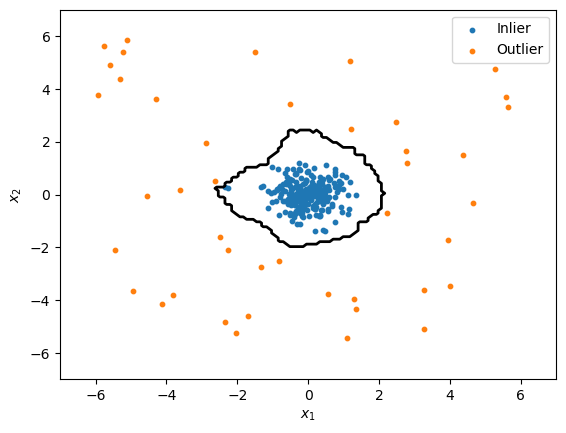

In [59]:
plot_od_predictions(outlier_detector, X)

Here is a [more detailed example](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py) from sklearn illustrating an isolation forest.

### Other Resources

Outlier detection is a field of study unto itself and there are many resources and algorithms for doing this.  One very useful tool, [pyOD](https://pyod.readthedocs.io/en/latest), provides pythonic implementations of popular and cutting-edge algorithms you can use "off-the-shelf".  See their benchmarks [here](https://arxiv.org/abs/2206.09426).

Here is a [sample comparison](https://pyod.readthedocs.io/en/latest/#adbench-benchmark-and-datasets) of various algorithms from the pyOD documentation:

![image](https://github.com/yzhao062/pyod/blob/development/examples/ALL.png?raw=true)

## Open Set Recognition

Recall, we introduced the idea of "open set recognition" (OSR) from ["Toward Open Set Recognition," by Scheirer et al.](https://ieeexplore.ieee.org/abstract/document/6365193):

[Open set recognition (OSR)](https://ieeexplore.ieee.org/abstract/document/6365193) - in this case, a model is trained on $K$ known classes, but expected to encounter $N > K$ during testing where $N$ is considered finite.  OCCs are the limit where $K = 1$.  We expect the model to make an assignment to one of the $K$ knowns or respond "none of the above" by [differentiating samples that are "in distribution" (ID) and should be predicted by the model vs. those "out of distribution" (OOD) which should not be.](https://arxiv.org/pdf/2110.14051)

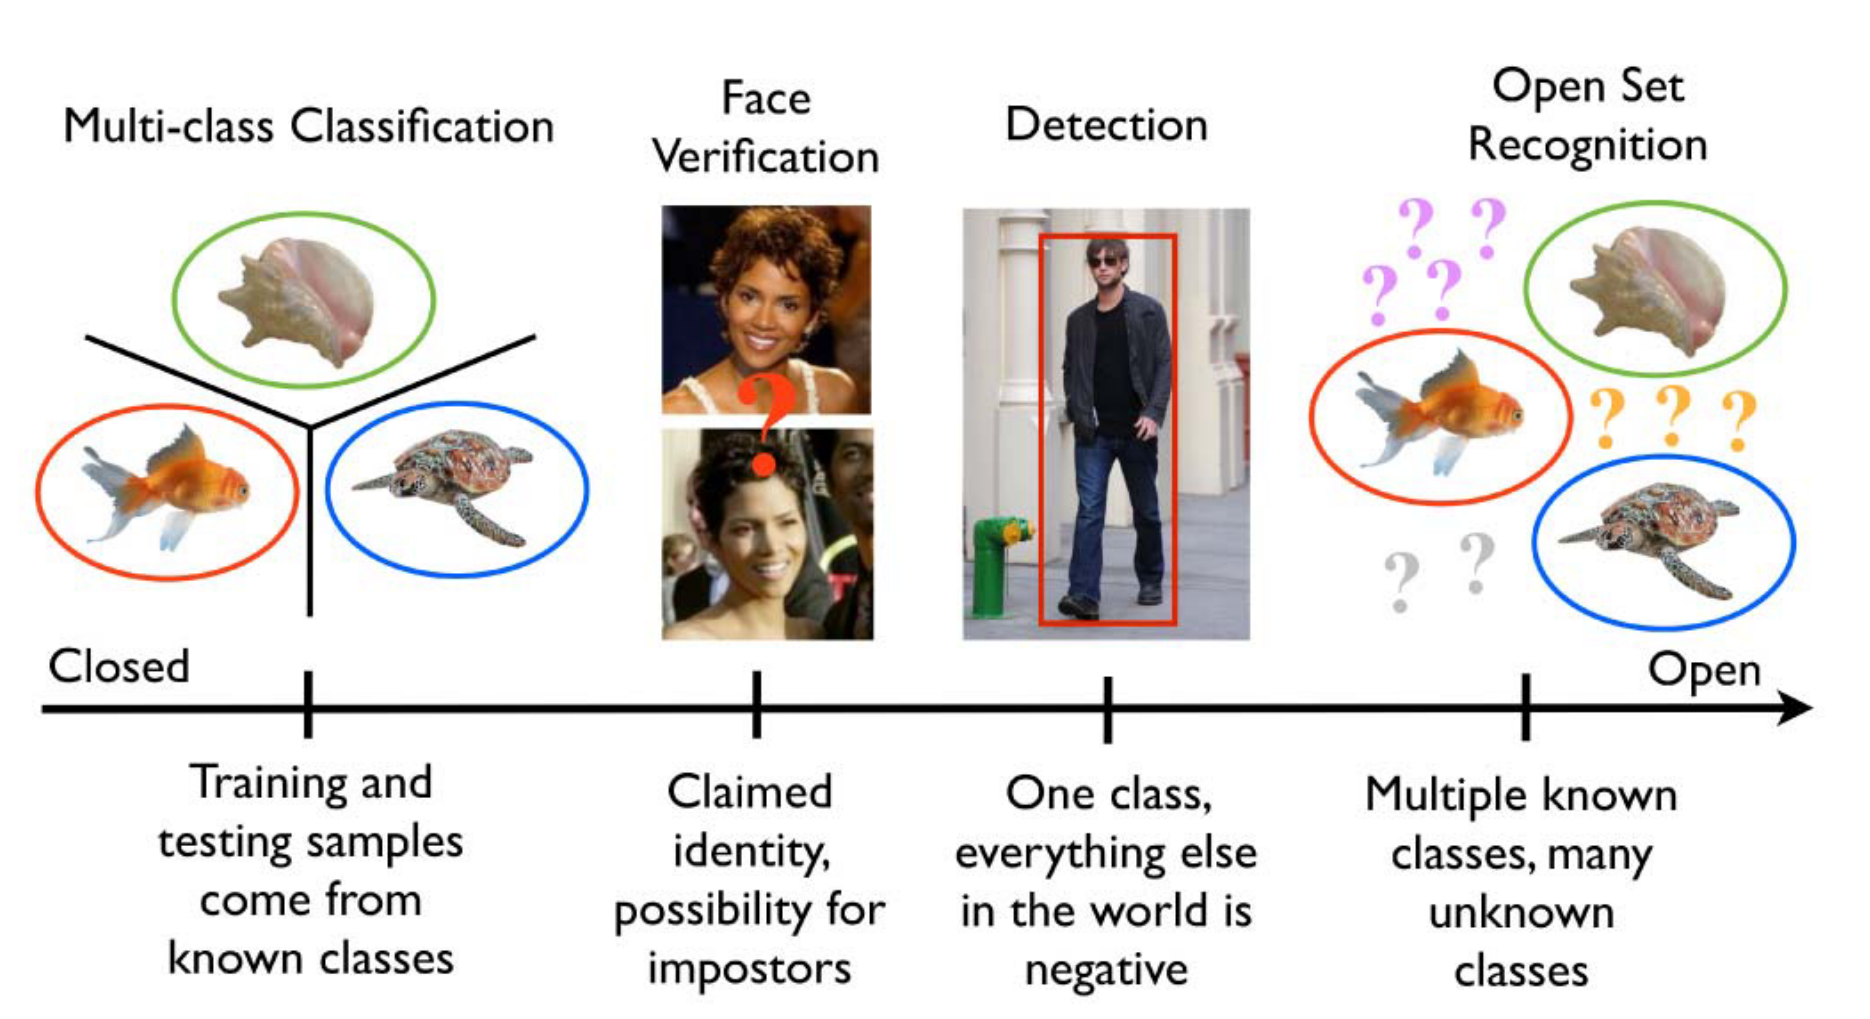

OSR relies on the underlying algorithm to distinguish between ID and OOD samples.  One simple way to achieve this is by combining outlier detection with (possibly closed set) classifiers; in pesudocode it might look something like this:

```python
class MyOSR:
  def __init__(self, closed_set_classifier, outlier_detector):
    self.clf = closed_set_classifier
    self.od = outlier_detector

  def fit(self, X_train, y_train):
    # Train the outlier detector
    self.od.fit(X_train)
    
    # Predict the inliers
    inlier_mask = self.od.predict(X_train)
    X_inliers = X_train[inlier_mask]

    # Only train the classifier on the inliers
    self.clf.fit(X_inliers, y_train[inlier_mask])

  def predict(self, X_test):
    # At prediction time, screen out the outliers
    predictions = np.array(['UNKNOWN']*X_test.shape[1], dtype=str)

    # Predict for the inlier point only
    inlier_mask = self.od.predict(X_test)
    predictions[inlier_mask] = self.clf.predict(X_test[inlier_mask])

    return predictions
```

💡 For example, we could combine an isolation forest outlier detector with a random forest classifer to make a composite model that can operate more reasonably under open set conditions!

⭐ This is an extremely general approach overall and [PyChemAuth has many documented examples](https://pychemauth.readthedocs.io/en/latest/jupyter/api/opensetclassification.html#Classification-Under-Open-Set-Conditions)


# AutoML

## What is it?

["AutoML"](https://www.automl.org/automl/) refers to ["automated machine learning"](https://en.wikipedia.org/wiki/Automated_machine_learning#:~:text=Automated%20machine%20learning%20(AutoML)%20is,learning%20to%20real%2Dworld%20problems.); that is, the automatic pipeline construction (including data preprocessing) and optimization.

The idea is that you can phrase the entire modeling pipeline construction and hyperparameter tuning process as a single optimization problem.  Then, given a finite set of computational resources, try to find the "best" pipeline in the amount of time or limited resources you allocate. Here is a visual description of [auto-sklearn](https://github.com/automl/auto-sklearn/).

<img src="https://github.com/automl/auto-sklearn/raw/development/doc/images/askl_pipeline.png" height=150 />

Lot's of powerful mathematics and optimization tools are used to automate most of the steps we have covered in this course so far.  The idea is that this will make ML more accessible to non-experts, reduce human errors, and enable research in applied settings.  While this is, itself, an exciting area of research, and has many applications in industrial settings, there is less utility in scientific applications.



## Caveats


<img src="https://filmschoolrejects.com/wp-content/uploads/2019/08/itsatrap-2.jpg" align="right" height=350 />

Recall the original taxonomy at the top of this notebook.  In scientific settings, the "best performing" model is not always the most useful or educational.  The process of building these models and evaluating them is a form of EDA which can be critical to the physical scientist.  Recall, the idea of Rashomon sets where we may have many nearly equally high performing models, but some are much simpler and (perhaps) informative.

In particular, it is often difficult to tell if the performance differences between models are statistically significant or not.  For data-intensive ML applications, model training and evaluation can get very expensive 💰 so less emphasis (to date) has been placed on determining this.  However, in the chemometric (generally low data limit) space we can often afford to evaluate this, and this will be the subject of a later section in this course.

This is not black-and-white, and there are certainly use cases for AutoML in science and engineering, but you should not flatly substitute AutoML for the task of modeling chemometric data (yet, anyway).

Model complexity also impacts the feasibility of real-world application.
An often cited example is the [$1 Million Netflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize), which was won in 2009 using ensemble methods (not done with AutoML, but still a very internally complex model). The details of the solution are published [here](https://www.asc.ohio-state.edu/statistics/dmsl/GrandPrize2009_BPC_BigChaos.pdf).

The winning team was awarded the money, however, Netflix never implemented the model:

> ["We evaluted some of the new methods offline but the additional accuracy gains that we measured did not seem to justify the engineering effort needed to bring them into a production environment."](https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429)